<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_104/blob/main/Reto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Reto - Entrega 1:**
###**Limpieza, análisis, visualización y kmeans**


<img src="https://static.wikia.nocookie.net/tecdemonterrey/images/1/1b/Logo_Tec_azul.png/revision/latest?cb=20190219041656&path-prefix=es" width="230" />

Maestría en Inteligencia Artificial Aplicada

**Datos generales**
---
EQUIPO 104

**Integrantes:**
* Eddie Guadalupe Elorza Ruiz | **A01793547**
* Yves Turley Macias Vargas. | **A00813752**


>Materia: Ciencia y analítica de datos (Gpo 10)

>Profesor Titular: PhD. María de la Paz Rico Fdz

>Profesor Tutor: Victoria Guerrero Orozco

16 de noviembre 2022

-----



##**Limpieza, análisis, visualización y kmeans**
En esta base de datos encontraras:

*   Aguas subterraneas.
*   Aguas superficiales.

Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

*   Limpieza de base de datos.
*   Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):

    Identificando tendencias centrales promedio, media y mediana de los datos. 
    Identificar medidas de dispersión, máximo, mínimo .
    Identificar medidas de posición no centrales, los cuartiles, outliers.   
    Identificar correlaciones.
    Preparar los datos 
*   Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
*   Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

Las aguas superficiales son aquellas que se mantienen sobre la tierra y en contacto con la atmósfera, es decir, en la superficie. Para identificarlas fácilmente podemos decir que son aquellas que podemos ver a simple vista o que no están bajo tierra.

Estos cuerpos de agua recogen el agua de las lluvias, nacimientos de agua y de los escurrimientos que provienen de otras fuentes de agua. El destino final de las aguas superficiales que tienen salida es un cuerpo de agua más grande, como por ejemplo ocurre con los ríos que llegan hasta el océano.

In [1]:
#Instalamos libreria para trabajar con mapas
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# PARTE 1

In [34]:
#Librerías a utilizar en el trabajo.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

import requests, zipfile
from io import BytesIO

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, Normalizer, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

In [35]:
#mandamos hablarle a nuestro dataset
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-YvTur/main/proyecto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020%20-%20Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv') # Mandando a llamar la base de datos que utilizaremos definiendo el ";" como separador de datos
df.head()


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,30,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


obtuvimos una matriz de 

3493 rows × 55 columns

In [36]:
df.isnull().any()


CLAVE                     False
SITIO                     False
ORGANISMO_DE_CUENCA       False
ESTADO                    False
MUNICIPIO                 False
CUENCA                     True
CUERPO DE AGUA             True
TIPO                      False
SUBTIPO                    True
LONGITUD                  False
LATITUD                   False
PERIODO                   False
DBO_mg/L                   True
CALIDAD_DBO                True
DQO_mg/L                   True
CALIDAD_DQO                True
SST_mg/L                   True
CALIDAD_SST                True
COLI_FEC_NMP_100mL         True
CALIDAD_COLI_FEC           True
E_COLI_NMP_100mL           True
CALIDAD_E_COLI             True
ENTEROC_NMP_100mL          True
CALIDAD_ENTEROC            True
OD_PORC                    True
CALIDAD_OD_PORC            True
OD_PORC_SUP                True
CALIDAD_OD_PORC_SUP        True
OD_PORC_MED                True
CALIDAD_OD_PORC_MED        True
OD_PORC_FON                True
CALIDAD_

In [37]:
df = df[df['CLAVE'].notnull()]

In [38]:
df.isnull().any()


CLAVE                     False
SITIO                     False
ORGANISMO_DE_CUENCA       False
ESTADO                    False
MUNICIPIO                 False
CUENCA                     True
CUERPO DE AGUA             True
TIPO                      False
SUBTIPO                    True
LONGITUD                  False
LATITUD                   False
PERIODO                   False
DBO_mg/L                   True
CALIDAD_DBO                True
DQO_mg/L                   True
CALIDAD_DQO                True
SST_mg/L                   True
CALIDAD_SST                True
COLI_FEC_NMP_100mL         True
CALIDAD_COLI_FEC           True
E_COLI_NMP_100mL           True
CALIDAD_E_COLI             True
ENTEROC_NMP_100mL          True
CALIDAD_ENTEROC            True
OD_PORC                    True
CALIDAD_OD_PORC            True
OD_PORC_SUP                True
CALIDAD_OD_PORC_SUP        True
OD_PORC_MED                True
CALIDAD_OD_PORC_MED        True
OD_PORC_FON                True
CALIDAD_

In [39]:
columns = ['CLAVE', 'ORGANISMO_DE_CUENCA', 'GRUPO', 'SUBTIPO', 'LONGITUD', 'LATITUD']


In [40]:
for i in df.columns:
    if i[:6] == 'CUMPLE':
        columns.append(i)

columns.append('SEMAFORO')

In [41]:
df_superficiales = df[columns]
df_superficiales

,CLAVE,ORGANISMO_DE_CUENCA,GRUPO,SUBTIPO,LONGITUD,LATITUD,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,SEMAFORO
0,DLAGU8,LERMA SANTIAGO PACIFICO,LENTICO,PRESA,-102.33911,22.24730,SI,NO,SI,NO,SI,ND,SI,SI,Rojo
1,DLBAJ100,PENINSULA DE BAJA CALIFORNIA,COSTERO,OCEANO-MAR,-109.84290,22.90473,ND,ND,SI,ND,ND,SI,SI,SI,Verde
2,DLBAJ101,PENINSULA DE BAJA CALIFORNIA,COSTERO,OCEANO-MAR,-109.86442,22.89880,ND,ND,SI,ND,ND,SI,SI,SI,Verde
3,DLBAJ102,PENINSULA DE BAJA CALIFORNIA,COSTERO,BAHIA,-109.88604,22.89609,ND,ND,SI,ND,ND,SI,SI,SI,Verde
4,DLBAJ103,PENINSULA DE BAJA CALIFORNIA,COSTERO,BAHIA,-109.89657,22.87694,ND,ND,SI,ND,ND,SI,SI,SI,Verde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,OCRBR5206M1,RIO BRAVO,LOTICO,RIO,-99.42142,26.78971,SI,SI,SI,NO,NO,ND,SI,SI,Amarillo
3489,OCRBR5207M1,RIO BRAVO,LENTICO,LAGO,-99.53064,27.43714,NO,NO,SI,NO,SI,ND,SI,SI,Rojo
3490,OCRBR5208M1,RIO BRAVO,LOTICO,RIO,-99.50727,27.49901,SI,NO,SI,SI,SI,ND,SI,SI,Rojo
3491,OCRBR5209M1,RIO BRAVO,LOTICO,RIO,-99.52221,27.49631,SI,SI,SI,NO,SI,ND,SI,SI,Amarillo


In [42]:
for column in columns:
    print(column + ': ', df_superficiales[df_superficiales[column] == 'ND'].shape)

CLAVE:  (0, 15)
ORGANISMO_DE_CUENCA:  (0, 15)
GRUPO:  (0, 15)
SUBTIPO:  (0, 15)
LONGITUD:  (0, 15)
LATITUD:  (0, 15)
CUMPLE_CON_DBO:  (912, 15)
CUMPLE_CON_DQO:  (912, 15)
CUMPLE_CON_SST:  (4, 15)
CUMPLE_CON_CF:  (911, 15)
CUMPLE_CON_E_COLI:  (911, 15)
CUMPLE_CON_ENTEROC:  (2589, 15)
CUMPLE_CON_OD:  (43, 15)
CUMPLE_CON_TOX:  (0, 15)
SEMAFORO:  (0, 15)


In [43]:
columns_o = df_superficiales.columns[np.array(df_superficiales.dtypes.astype(str)=='object')]
df_superficiales[columns_o].describe()

,CLAVE,ORGANISMO_DE_CUENCA,GRUPO,SUBTIPO,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,SEMAFORO
count,3493,3493,3493,3479,3493,3493,3493,3493,3493,3493,3493,3493,3493
unique,3493,13,3,27,3,3,3,3,3,3,3,2,3
top,DLAGU8,LERMA SANTIAGO PACIFICO,LOTICO,RIO,SI,SI,SI,NO,SI,ND,SI,SI,Verde
freq,1,709,1772,1478,2319,1650,3104,1634,1453,2589,2958,3411,1267


In [44]:
df_superficiales.describe().T

,count,mean,std,min,25%,50%,75%,max
LONGITUD,3493.0,-100.359969,6.122773,-117.12403,-103.88231,-99.79553,-96.86023,-86.73215
LATITUD,3493.0,21.046992,3.893696,14.53491,18.39607,20.14898,22.82893,32.70650


In [45]:
df_superficiales.columns

Index(['CLAVE', 'ORGANISMO_DE_CUENCA', 'GRUPO', 'SUBTIPO', 'LONGITUD',
       'LATITUD', 'CUMPLE_CON_DBO', 'CUMPLE_CON_DQO', 'CUMPLE_CON_SST',
       'CUMPLE_CON_CF', 'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC',
       'CUMPLE_CON_OD', 'CUMPLE_CON_TOX', 'SEMAFORO'],
      dtype='object')

In [46]:
df_superficiales.shape

(3493, 15)

In [47]:
df_superficiales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE                3493 non-null   object 
 1   ORGANISMO_DE_CUENCA  3493 non-null   object 
 2   GRUPO                3493 non-null   object 
 3   SUBTIPO              3479 non-null   object 
 4   LONGITUD             3493 non-null   float64
 5   LATITUD              3493 non-null   float64
 6   CUMPLE_CON_DBO       3493 non-null   object 
 7   CUMPLE_CON_DQO       3493 non-null   object 
 8   CUMPLE_CON_SST       3493 non-null   object 
 9   CUMPLE_CON_CF        3493 non-null   object 
 10  CUMPLE_CON_E_COLI    3493 non-null   object 
 11  CUMPLE_CON_ENTEROC   3493 non-null   object 
 12  CUMPLE_CON_OD        3493 non-null   object 
 13  CUMPLE_CON_TOX       3493 non-null   object 
 14  SEMAFORO             3493 non-null   object 
dtypes: float64(2), object(13)
memory usage

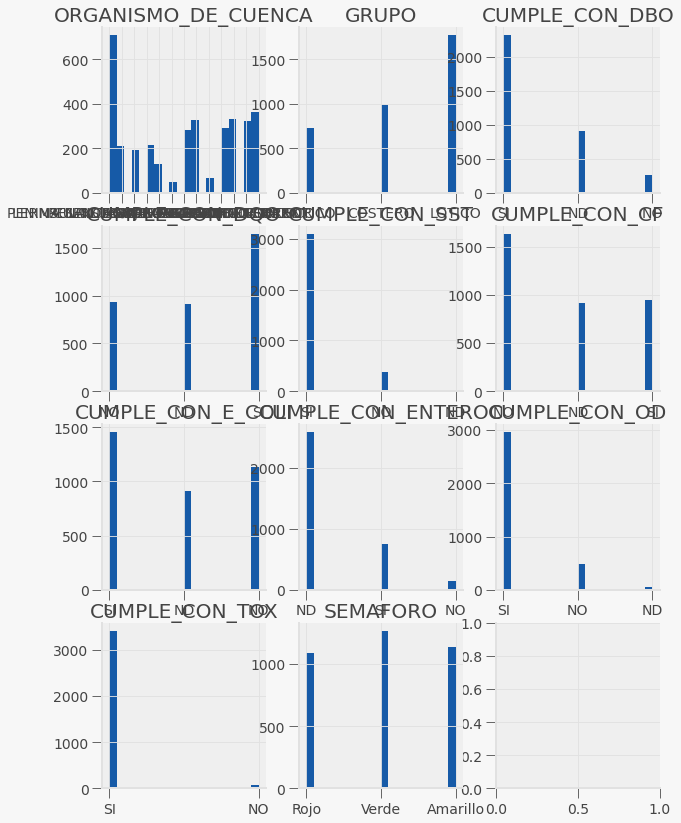

In [48]:
a = columns_o.tolist()
a.remove('CLAVE')
a.remove('SUBTIPO')

fig, axes = plt.subplots(4, 3, figsize =(10, 14))

for i in range(len(a)):
    plt.subplot(4,3,i+1)
    plt.hist(df_superficiales[a[i]], 20)
    plt.title(a[i])

plt.show()

In [49]:
columns_f = df_superficiales.columns[np.array(df_superficiales.dtypes.astype(str)=='float64')]
df_superficiales[columns_f].describe()

,LONGITUD,LATITUD
count,3493.000000,3493.000000
mean,-100.359969,21.046992
std,6.122773,3.893696
min,-117.124030,14.534910
25%,-103.882310,18.396070
50%,-99.795530,20.148980
75%,-96.860230,22.828930
max,-86.732150,32.706500


# PARTE 2

In [50]:
g_df = df_superficiales[['LONGITUD', 'LATITUD']]
g_df['Coordinates'] = list(zip(g_df['LONGITUD'], g_df['LATITUD']))
g_df['Coordinates'] = g_df['Coordinates'].apply(Point)

g_df = gpd.GeoDataFrame(g_df, geometry='Coordinates')

In [51]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

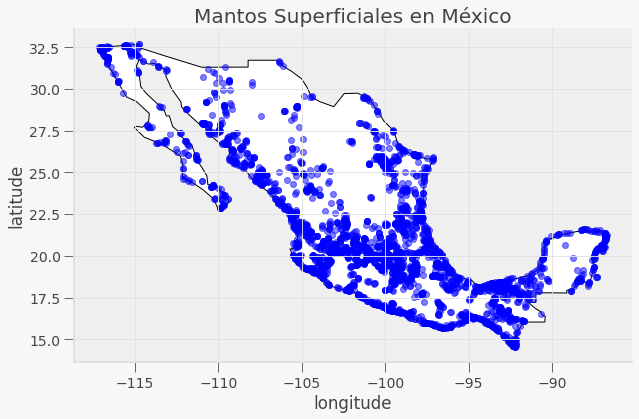

In [52]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

g_df.plot(ax=gax, color='blue', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Mantos Superficiales en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [53]:
g_df = df_superficiales[['LONGITUD', 'LATITUD']]
g_df['Coordinates'] = list(zip(g_df['LONGITUD'], g_df['LATITUD']))
g_df['Coordinates'] = g_df['Coordinates'].apply(Point)

g_df = gpd.GeoDataFrame(g_df, geometry='Coordinates')
g_df_v = g_df[df_superficiales['SEMAFORO']=='Verde']
g_df_a = g_df[df_superficiales['SEMAFORO']=='Amarillo']
g_df_r = g_df[df_superficiales['SEMAFORO']=='Rojo']

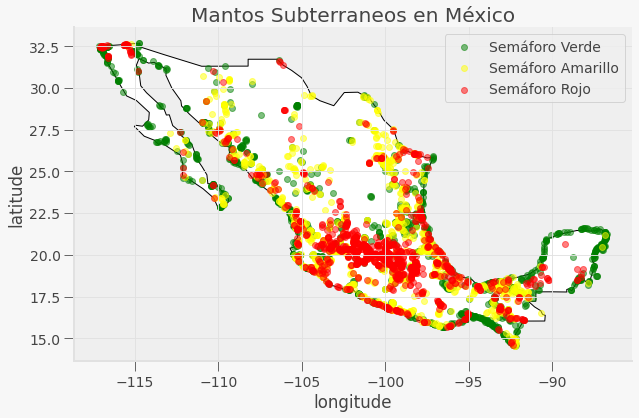

In [54]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

g_df_v.plot(ax=gax, color='green', alpha = 0.5, label='Semáforo Verde')
g_df_a.plot(ax=gax, color='yellow', alpha = 0.5, label='Semáforo Amarillo')
g_df_r.plot(ax=gax, color='red', alpha = 0.5, label='Semáforo Rojo')


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Mantos Subterraneos en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.legend()
plt.show()

In [55]:
km_scores= []
km_silhouette = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_superficiales[['LATITUD', 'LONGITUD']])
    classification = kmeans.predict(df_superficiales[['LATITUD', 'LONGITUD']])

    km_scores.append(-kmeans.score(df_superficiales[['LATITUD', 'LONGITUD']]))
    
    silhouette = silhouette_score(df_superficiales[['LATITUD', 'LONGITUD']], classification)
    km_silhouette.append(silhouette)

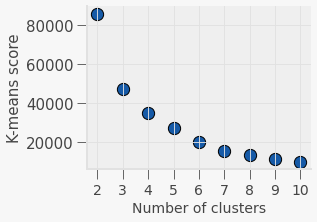

In [56]:
plt.figure(figsize=(4,3))
plt.scatter(x=[i for i in range(2,11)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,11)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

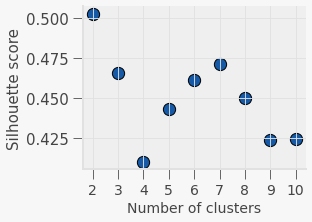

In [57]:
plt.figure(figsize=(4,3))
plt.scatter(x=[i for i in range(2,11)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,11)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [58]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_superficiales[['LATITUD', 'LONGITUD']])

centers = kmeans.cluster_centers_
centers = pd.DataFrame(centers, columns=['LATITUD', 'LONGITUD'])
centers['Coordinates'] = list(zip(centers['LONGITUD'], centers['LATITUD']))
centers['Coordinates'] = centers['Coordinates'].apply(Point)

g_centers = gpd.GeoDataFrame(centers, geometry='Coordinates')

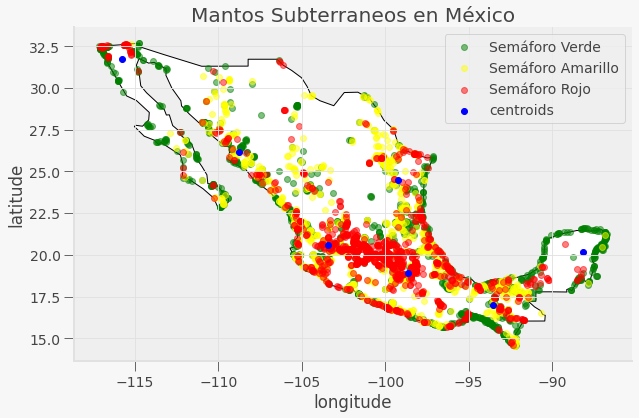

In [59]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

g_df_v.plot(ax=gax, color='green', alpha = 0.5, label='Semáforo Verde')
g_df_a.plot(ax=gax, color='yellow', alpha = 0.5, label='Semáforo Amarillo')
g_df_r.plot(ax=gax, color='red', alpha = 0.5, label='Semáforo Rojo')

g_centers.plot(ax=gax, color='blue', alpha = 1, label=str('centroids'))    

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Mantos Subterraneos en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.legend()
plt.show()

In [61]:
clusters = kmeans.predict(df_superficiales[['LATITUD', 'LONGITUD']])
df_superficiales['clusters'] = clusters

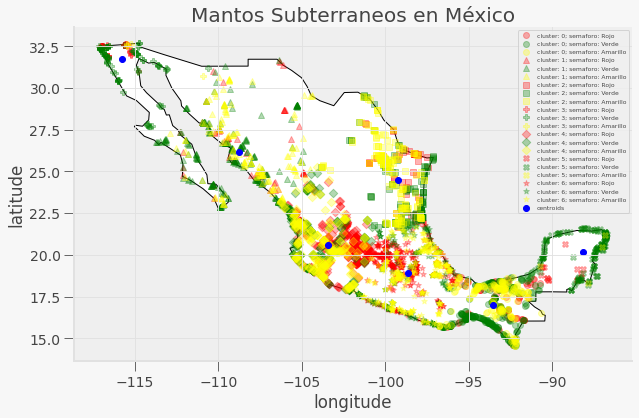

In [63]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

markers = ["o", "^", "s", "P", "D", "X", "*"]
semaforos = ['Verde', 'Amarillo', 'Rojo']
colors = ['green', 'yellow', 'red']

for cluster in range(len(df_superficiales['clusters'].unique())):
    for semaforo in df_superficiales['SEMAFORO'].unique():
        color = colors[semaforos.index(semaforo)]  
        marker = markers[cluster]
        label = 'cluster: ' + str(cluster) + '; semaforo: ' + semaforo
        g_df[(df_superficiales['clusters']==cluster) & (df_superficiales['SEMAFORO']==semaforo)].plot(ax=gax, color=color, marker=marker, alpha = 0.3, label=label)

g_centers.plot(ax=gax, color='blue', alpha = 1, label=str('centroids'))    

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Mantos Subterraneos en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.legend(loc=1, prop={'size': 6})
plt.show()

In [66]:
Dic = {}

Dic['semaforo'] = ['Verde', 'Amarillo', 'Rojo', 'Total']

for cluster in range(len(df_superficiales['clusters'].unique())):
    Dic['cluster ' + str(cluster)] = [df_superficiales[(df_superficiales['SEMAFORO']=='Verde') & (df_superficiales['clusters']==cluster)].shape[0],
                    df_superficiales[(df_superficiales['SEMAFORO']=='Amarillo') & (df_superficiales['clusters']==cluster)].shape[0],
                    df_superficiales[(df_superficiales['SEMAFORO']=='Rojo') & (df_superficiales['clusters']==cluster)].shape[0],
                    df_superficiales[df_superficiales['clusters']==cluster].shape[0]                 ]


    
results = pd.DataFrame(Dic)
results = results.set_index('semaforo')
results.index.name = None
results

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6
Verde,276,212,134,87,205,148,205
Amarillo,188,148,189,5,275,4,326
Rojo,99,57,74,41,333,15,472
Total,563,417,397,133,813,167,1003


# **CONCLUSIONES**

# ***Bibliografía***

Qué son las aguas superficiales. https://www.ecologiaverde.com/que-son-las-aguas-superficiales-definicion-y-ejemplos-3944.html